# Lecture 8: Regression
ENVR 890-001: Python for Environmental Research, Fall 2020

October 16, 2020

By Andrew Hamilton.

### Summary
Linear regression is ubiquitous across a wide range of science, engineering, and public health applications. This is not a statistics class, so we won't spend much time on the theory. Rather, we will focus on implementing linear regression and related concepts in Python. However, you should absolutely learn some statistics (or consult with an expert) before using these concepts in your research! 

### Read in our data

I downloaded from the [EPA Acid Rain emissions reporting database](https://ampd.epa.gov/ampd/). This dataset contains statewide quarterly emissions of SO2, NOx, and CO2 from eligible coal plants in NC and SC from 1997-2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

df = pd.read_csv('NC_SC_acid_rain_emissions.csv', sep=',', header=1)
df.columns = ['state', 'year', 'quarter', 'program', 'so2', 'nox', 'co2', 'heatinput']
df

,state,year,quarter,program,so2,nox,co2,heatinput
0,NC,2017,1,ARP,3088.057,6627.984,1.177807e+07,1.439023e+08
1,NC,2017,2,ARP,3771.224,7770.051,1.259458e+07,1.495152e+08
2,NC,2017,3,ARP,6054.505,10265.869,1.707442e+07,2.002756e+08
3,NC,2017,4,ARP,3307.317,7532.182,1.140865e+07,1.421079e+08
4,NC,2018,1,ARP,3930.952,8266.694,1.362151e+07,1.649823e+08
...,...,...,...,...,...,...,...,...
185,SC,2015,4,ARP,1274.022,2197.494,6.405202e+06,7.870638e+07
186,SC,2016,1,ARP,2079.528,2809.411,7.043278e+06,8.058031e+07
187,SC,2016,2,ARP,1954.405,2613.211,7.139541e+06,8.186110e+07
188,SC,2016,3,ARP,2521.992,3559.830,9.782372e+06,1.142828e+08


**Scatterplot to look at data, NOx vs year**

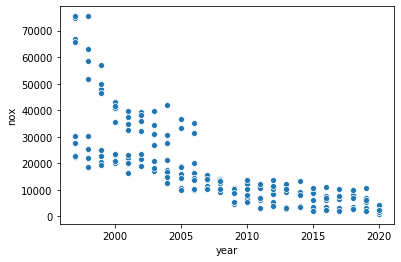

In [2]:
sns.scatterplot('year', 'nox', data=df)

### Linear regression, NOx against year

In general, we can write linear regression as:

$$y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_p x_{ip} + \varepsilon_i$$

for all data points $i$ with independent variables (regressors) $\mathbf{x}$ and dependent variable $y$. Ordinary Least Squares (OLS) tries to find the coefficients $\boldsymbol{\beta}$ that minimize the sum of the squared errors, $\boldsymbol{\varepsilon}$.

In the current context, we can simplify this as:

$$NOx_i = \beta_0 + \beta_1 YEAR_{i} + \varepsilon_i$$

where $\beta_0$ is the intercept and $\beta_1$ is the slope of the regression line.

In [3]:
### Define linear regression object, with equation written in quotes (no need to write constant term)
lm_nox_year = sm.ols('nox ~ year', data=df)
lm_nox_year

In [4]:
### run regression
lm_nox_year_fit = lm_nox_year.fit()
lm_nox_year_fit

In [5]:
### print regression summary statistics
print(lm_nox_year_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     283.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.29e-39
Time:                        10:18:38   Log-Likelihood:                -2017.0
No. Observations:                 190   AIC:                             4038.
Df Residuals:                     188   BIC:                             4045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.564e+06   2.11e+05     16.910      0.0

In [6]:
### regression coefficients (betas)
params = lm_nox_year_fit.params
print(params)

Intercept    3.564446e+06
year        -1.766318e+03
dtype: float64


In [11]:
## get predicted nox as a function of year based on regression
## you can also do this by defining a function and calling the individual parameters]
years = pd.DataFrame(np.arange(1995, 2021),columns=['year'])
prediction = lm_nox_year_fit.predict(years)
print(prediction.head())

0    40640.435263
1    38874.116793
2    37107.798324
3    35341.479855
4    33575.161385
dtype: float64


In [8]:
def predict_nox_year(params, years):
    return params[0] + params[1] * years

In [10]:
predicted_nox = predict_nox_year(params, years)
print(predicted_nox.head())

           year
0  40640.435263
1  38874.116793
2  37107.798324
3  35341.479855
4  33575.161385


Text(0.5, 0, 'Year')

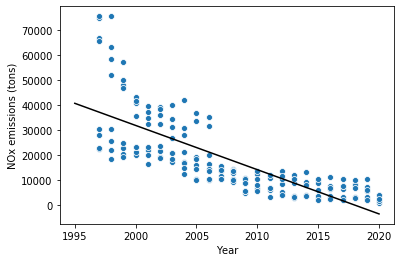

In [12]:
sns.scatterplot('year', 'nox', data=df)
plt.plot(years, prediction, color='k')
plt.ylabel('NOx emissions (tons)')
plt.xlabel('Year')

**Check if regression conditions are met - normality?**

(array([67., 52., 29., 10., 12.,  8.,  4.,  2.,  3.,  3.]),
 array([  947.276 ,  8392.7264, 15838.1768, 23283.6272, 30729.0776,
        38174.528 , 45619.9784, 53065.4288, 60510.8792, 67956.3296,
        75401.78  ]),
 <a list of 10 Patch objects>)

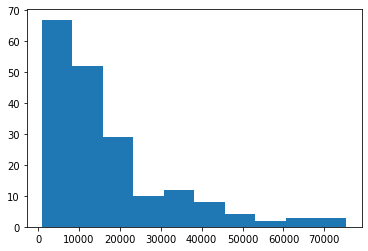

In [13]:
plt.hist(df['nox'])

**Try log transform of data**

In [14]:
df['nox_log'] = np.log(df['nox'])
df.head()

,state,year,quarter,program,so2,nox,co2,heatinput,nox_log
0,NC,2017,1,ARP,3088.057,6627.984,11778066.24,143902340.0,8.799056
1,NC,2017,2,ARP,3771.224,7770.051,12594579.74,149515188.3,8.958032
2,NC,2017,3,ARP,6054.505,10265.869,17074422.27,200275610.8,9.236580
3,NC,2017,4,ARP,3307.317,7532.182,11408654.15,142107926.7,8.926940
4,NC,2018,1,ARP,3930.952,8266.694,13621514.75,164982269.3,9.019990


(array([ 1.,  6., 21., 13., 26., 35., 33., 24., 21., 10.]),
 array([ 6.8535905 ,  7.29129006,  7.72898963,  8.1666892 ,  8.60438876,
         9.04208833,  9.4797879 ,  9.91748746, 10.35518703, 10.79288659,
        11.23058616]),
 <a list of 10 Patch objects>)

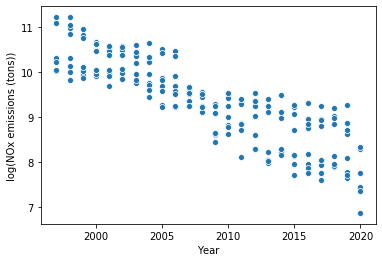

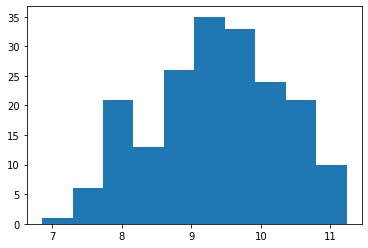

In [15]:
plt.figure()
sns.scatterplot('year', 'nox_log', data=df)
plt.ylabel('log(NOx emissions (tons))')
plt.xlabel('Year')

plt.figure()
plt.hist(df['nox_log'])

**QQ-plot**

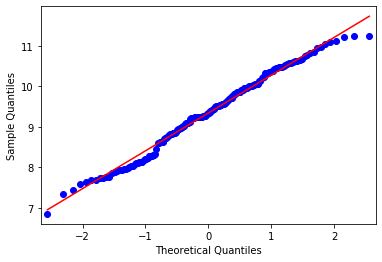

In [16]:
from statsmodels.graphics.gofplots import qqplot
fig = qqplot(df['nox_log'], line='s')

**Test for normality with Shapiro-Wilk test**

Refresher: the null hypothesis here is that the data are normally distributed. Given your appropriate p-value (using 0.05 here), if the p-value is less than 0.05 then the data are **not** normally distributed. If the p-value is greater, than they are. 

In [17]:
from scipy.stats import shapiro
stat, p = shapiro(df['nox_log'])
print(stat, p)

0.9855313897132874 0.048119135200977325


**Try Box-Cox transformation**

This will transform the input data into a (more) normal distribution using a value scipy can calculate for us automatically: lambda. Lambda is used in an equation which transforms the data ([see this Geeks for Geeks article for the equation](https://www.geeksforgeeks.org/box-cox-transformation-using-python/).) 

In [23]:
from scipy.stats import boxcox
df['nox_bc'], lam = boxcox(df['nox'])
lam

0.06979101291062871

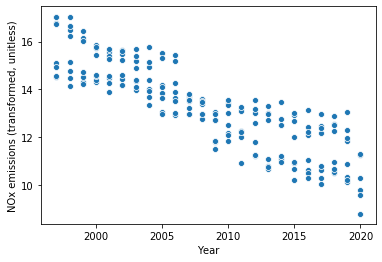

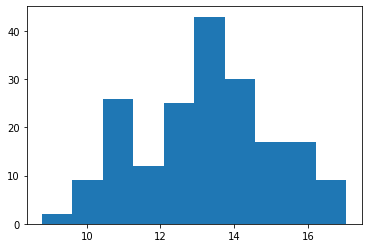

<Figure size 432x288 with 0 Axes>

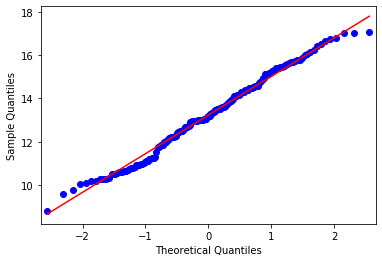

In [19]:
plt.figure()
sns.scatterplot('year', 'nox_bc', data=df)
plt.ylabel('NOx emissions (transformed, unitless)')
plt.xlabel('Year')

plt.figure()
plt.hist(df['nox_bc'])

plt.figure()
fig = qqplot(df['nox_bc'], line='s')

In [24]:
stat, p = shapiro(df['nox_bc'])
print(stat, p)

0.9870161414146423 0.07854940742254257


In [25]:
lm_nox_year = sm.ols('nox_bc ~ year', data=df)
lm_nox_year_fit = lm_nox_year.fit()
print(lm_nox_year_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     574.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.55e-59
Time:                        10:36:34   Log-Likelihood:                -246.62
No. Observations:                 190   AIC:                             497.2
Df Residuals:                     188   BIC:                             503.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    466.9815     18.929     24.670      0.0

Text(0.5, 0, 'Year')

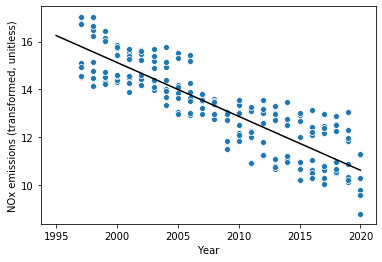

In [26]:
prediction = lm_nox_year_fit.predict(years)
sns.scatterplot('year', 'nox_bc', data=df)
plt.plot(years, prediction, color='k')
plt.ylabel('NOx emissions (transformed, unitless)')
plt.xlabel('Year')

**Transforming prediction back to original scale**

In [32]:
def box_cox_inverse(x, lam):
    if lam > 0:
        return (x * lam + 1) ** (1 / lam)
    elif lam == 0:
        return np.exp(x)
    else:
        print('Invalid lambda')

In [33]:
prediction_tons = box_cox_inverse(prediction, lam)
prediction_tons.head()

0    52216.590779
1    46953.245558
2    42186.938255
3    37873.940597
4    33974.085019
dtype: float64

Text(0.5, 0, 'Year')

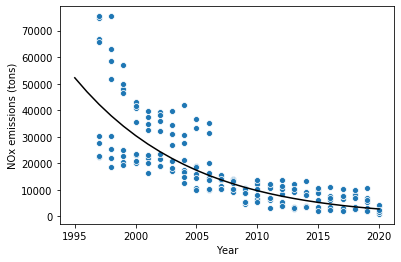

In [34]:
sns.scatterplot('year', 'nox', data=df)
plt.plot(years, prediction_tons, color='k')
plt.ylabel('NOx emissions (tons)')
plt.xlabel('Year')

**Check for homoskedasticity**

Reminder: this just means checking for constant, finite variance - we can do this by plotting the residuals of the data. 

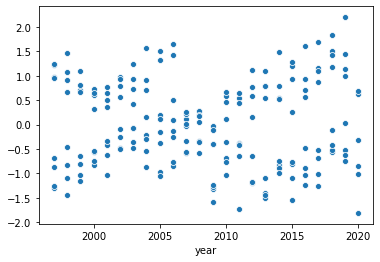

In [36]:
resids = lm_nox_year_fit.resid
sns.scatterplot(df['year'], resids)

**Adding parameters: account for state differences**

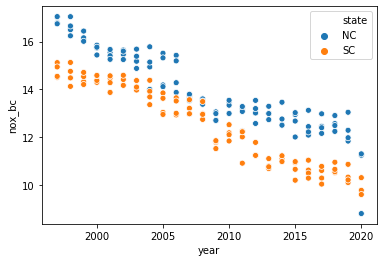

In [38]:
sns.scatterplot('year', 'nox_bc', data=df, hue = 'state')

Now we want to add an additional regressor, so that our regression reads:

$$NOx_i = \beta_0 + \beta_1 YEAR_{i}  + \beta_2 IS\_SC_i + \varepsilon_i$$

where $\beta_0$ is the intercept, $\beta_1$ is the slope with respect to year, and $\beta_2$ is a constant shift if the observation comes from SC.

In [58]:
lm_nox_year_state = sm.ols('nox_bc ~ year + state', data=df)
lm_nox_year_state_fit = lm_nox_year_state.fit()
print(lm_nox_year_state_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1073.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          3.36e-103
Time:                        10:51:46   Log-Likelihood:                -139.91
No. Observations:                 190   AIC:                             285.8
Df Residuals:                     187   BIC:                             295.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     467.7094     10.824     43.212      

In [61]:
## let's try doing this with a function and calling the parameters
def predict_nox_year_state(params, years, SC_binary):
    return params[0] + params[1] * SC_binary + params[2] * years


In [62]:
years = np.arange(1995, 2021)
## since we just have two states, we can use a simple binary: SC will be 1 and NC will be 0 
SC_isSC = np.ones(len(years))
NC_isSC = np.zeros(len(years))
prediction_SC = predict_nox_year_state(lm_nox_year_state_fit.params, years, SC_isSC)
prediction_NC = predict_nox_year_state(lm_nox_year_state_fit.params, years, NC_isSC)

## In-class exercise ##

1. Run the regression using ".predict()" (remember: we need out inputs in a single dataframe for this to work -- year and state). 
1. Create a seaborn scatterplot showing the actual data, with year on the x axis and NOx on the y axis. 
1. Overlay on that scatterplot (i.e. just add the lines on top of it) a blue line with predicted NOx in NC and an orange line with predicted NOx in SC


Text(0.5, 0, 'Year')

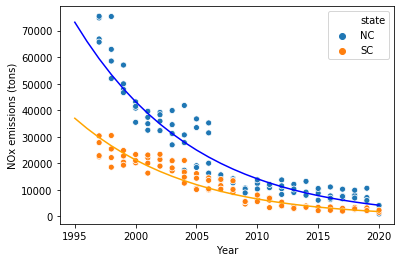

In [63]:
prediction_tons_SC = box_cox_inverse(prediction_SC, lam)
prediction_tons_NC = box_cox_inverse(prediction_NC, lam)
sns.scatterplot('year', 'nox', data=df, hue='state')
plt.plot(years, prediction_tons_SC, color='orange')
plt.plot(years, prediction_tons_NC, color='blue')
plt.ylabel('NOx emissions (tons)')
plt.xlabel('Year')

**Interaction effects**

In [64]:
lm_nox_year_state_int = sm.ols('nox_bc ~ year*state', data=df)
lm_nox_year_state_int_fit = lm_nox_year_state_int.fit()
print(lm_nox_year_state_int_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     715.8
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          7.27e-102
Time:                        10:52:46   Log-Likelihood:                -139.36
No. Observations:                 190   AIC:                             286.7
Df Residuals:                     186   BIC:                             299.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          456.4890     15.304  

**Interaction is not significant in this case, but let's visualize model anyway**

In [65]:
## let's try doing this with a function and calling the parameters
## note, if were were to continue using ols_fit.predict(), 
## we would need to put the inputs in a single dataframe

def predict_nox_year_state_int(params, years, SC_binary):
    return params[0] + params[1] * SC_binary + params[2] * years + params[3] * SC_binary * years

In [66]:
prediction_SC = predict_nox_year_state_int(lm_nox_year_state_int_fit.params, years, SC_isSC)
prediction_NC = predict_nox_year_state_int(lm_nox_year_state_int_fit.params, years, NC_isSC)

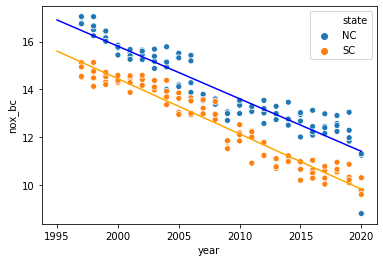

In [67]:
sns.scatterplot('year', 'nox_bc', data=df, hue='state')
plt.plot(years, prediction_SC, color='orange')
plt.plot(years, prediction_NC, color='blue')

**Check for quarterly effects?**

In [68]:
lm_nox_year_state_q = sm.ols('nox_bc ~ year + state + quarter', data=df)
lm_nox_year_state_q_fit = lm_nox_year_state_q.fit()
print(lm_nox_year_state_q_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     716.8
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          6.50e-102
Time:                        10:52:55   Log-Likelihood:                -139.25
No. Observations:                 190   AIC:                             286.5
Df Residuals:                     186   BIC:                             299.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     468.1001     10.820     43.261      

**Probably don't want quarter as an integer (implies linear relationship between seasons). Let's redo as categorical.**

In [69]:
df['quarter_cat'] = [str(q) for q in df['quarter']]
type(df['quarter_cat'][0])

str

In [70]:
lm_nox_year_state_q = sm.ols('nox_bc ~ year + state + quarter_cat', data=df)
lm_nox_year_state_q_fit = lm_nox_year_state_q.fit()
print(lm_nox_year_state_q_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 nox_bc   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     439.1
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          3.18e-100
Time:                        10:53:05   Log-Likelihood:                -136.47
No. Observations:                 190   AIC:                             284.9
Df Residuals:                     184   BIC:                             304.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          468.3186     10.722  

**ANOVA test for difference in mean between NC vs SC**

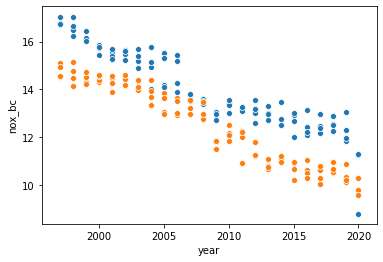

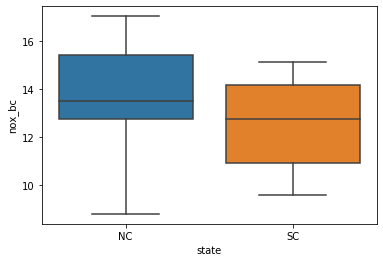

In [72]:
## For ANOVA test we need to separate samples
df_nc = df.loc[df['state'] == 'NC', :]
df_sc = df.loc[df['state'] == 'SC', :]
plt.figure()
sns.scatterplot(df_nc['year'], df_nc['nox_bc'])
sns.scatterplot(df_sc['year'], df_sc['nox_bc'])
plt.figure()
sns.boxplot('state', 'nox_bc', data=df)

In [73]:
## ANOVA test
## the test returns the F statistic of the test along with the p-value from the F distribution
## p-value greater than what we set (say 0.05 for our purposes) means that the differences in mean are not statistically
## significant, while a p-value less than or equal to means that they are statistically significant 

from scipy.stats import f_oneway

f_oneway(df_nc['nox_bc'], df_sc['nox_bc'])

F_onewayResult(statistic=37.51228177961964, pvalue=5.197934502526843e-09)

**Test for difference in mean between quarters in NC**

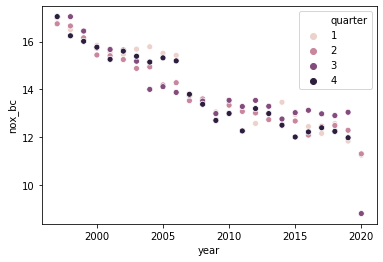

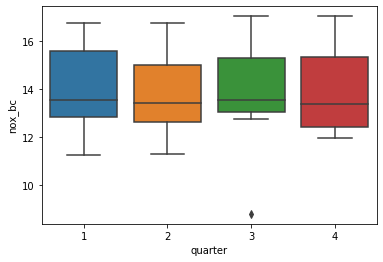

In [74]:
plt.figure()
sns.scatterplot('year', 'nox_bc', data=df_nc, hue='quarter')
plt.figure()
sns.boxplot('quarter', 'nox_bc', data=df_nc)

In [75]:
df_nc_q1 = df_nc.loc[df_nc['quarter'] == 1, :]
df_nc_q2 = df_nc.loc[df_nc['quarter'] == 2, :]
df_nc_q3 = df_nc.loc[df_nc['quarter'] == 3, :]
df_nc_q4 = df_nc.loc[df_nc['quarter'] == 4, :]

f_oneway(df_nc_q1['nox_bc'], df_nc_q2['nox_bc'], df_nc_q3['nox_bc'], df_nc_q4['nox_bc'])

F_onewayResult(statistic=0.09676903132215914, pvalue=0.9616321455374468)

### In-class exercise
Run a regression to test whether there has been a statistically significant reduction in reported CO2 emissions in North Carolina (note: this only comes from a subset of coal plants, not a full picture of CO2 emissions). Perform any statistical checks & transformations if necessary.

### Data smoothing 

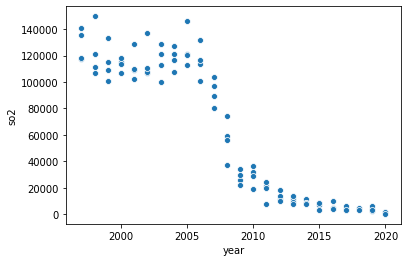

In [76]:
sns.scatterplot('year','so2', data=df_nc)

**Simple smoothing - line segments through means of each year**

In [77]:
df_nc_yearly = df_nc.groupby('year').mean()
df_nc_yearly

,quarter,so2,nox,co2,heatinput,nox_log,nox_bc
year,,,,,,,
1997,2.5,127989.569250,70669.34550,1.891000e+07,1.846805e+08,11.163785,16.901895
1998,2.5,122145.952750,62181.96625,1.840558e+07,1.803841e+08,11.028650,16.609806
1999,2.5,114485.645250,50356.93975,1.824346e+07,1.787225e+08,10.823826,16.169793
2000,2.5,113360.592750,40214.40225,1.851418e+07,1.817438e+08,10.599301,15.695576
2001,2.5,112621.635000,36084.66050,1.770498e+07,1.739513e+08,10.490887,15.469261
2002,2.5,115748.281250,36426.42525,1.821641e+07,1.807777e+08,10.500311,15.488872
2003,2.5,115510.188250,33165.90575,1.796947e+07,1.772706e+08,10.399083,15.280033
2004,2.5,118080.042000,29430.57625,1.822001e+07,1.798254e+08,10.242635,14.964076
2005,2.5,125233.896750,26937.31225,1.889529e+07,1.871322e+08,10.152503,14.780413


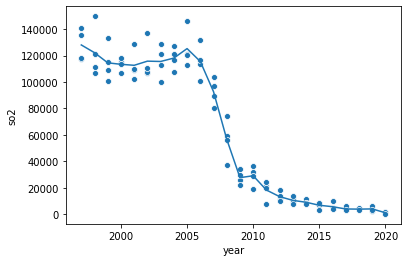

In [78]:
sns.scatterplot('year','so2', data=df_nc)
plt.plot(df_nc_yearly.index, df_nc_yearly['so2'])

**Lowess smoothing**

In [79]:
from statsmodels.nonparametric.smoothers_lowess import lowess

## fraction of data to use for each smoothed value (b/w 0 and 1, default is 0.67)
lowess_frac = 0.2

## get smoothed points
smooth = lowess(df_nc['so2'], df_nc['year'], frac=lowess_frac)
index_smooth, so2_smooth = np.transpose(smooth)

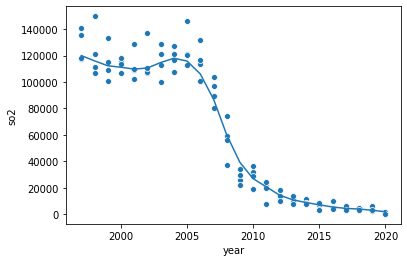

In [80]:
sns.scatterplot('year','so2', data=df_nc)
plt.plot(index_smooth, so2_smooth)